In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs  # We'll use this if we can't access the mall dataset

# Load the dataset (Mall Customer Segmentation Data)
# If the link doesn't work, we'll use a synthetic dataset
try:
    df = pd.read_csv('Mall_Customers.csv')
    print("Mall Customers dataset loaded successfully!")
    # Rename columns for clarity
    df = df.rename(columns={
        'Annual Income (k$)': 'Income',
        'Spending Score (1-100)': 'SpendingScore'
    })
    # Select relevant features
    X = df[['Income', 'SpendingScore']].values
except:
    print("Couldn't load Mall dataset. Using synthetic data instead.")
    # Generate synthetic data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

Couldn't load Mall dataset. Using synthetic data instead.


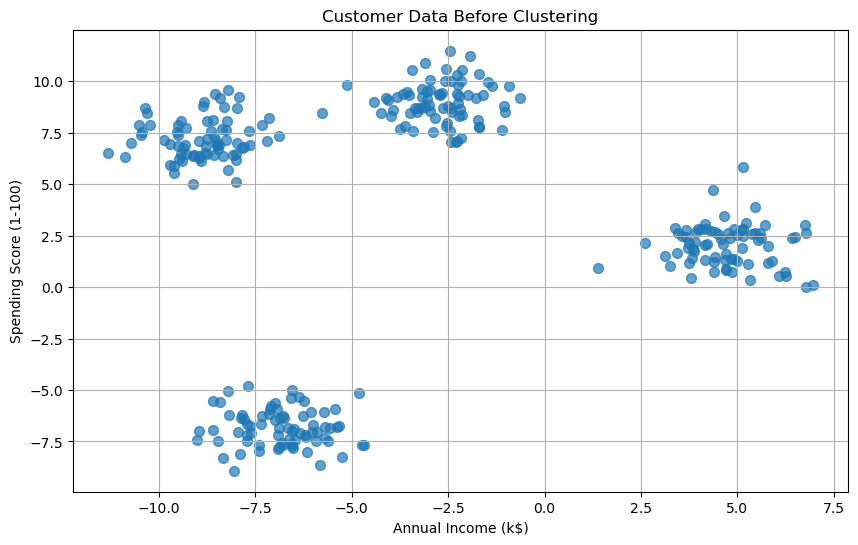

In [2]:
# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title('Customer Data Before Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

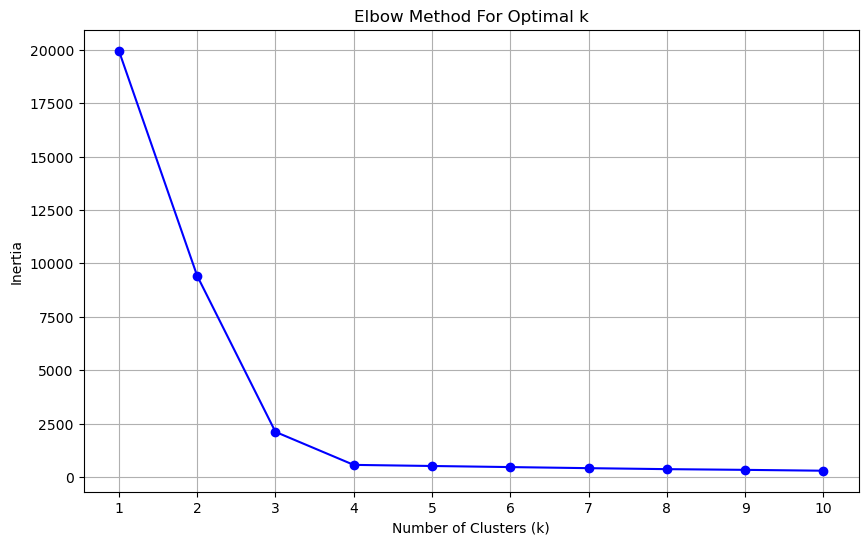

In [3]:
# Calculate inertia for different k values
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

For k=2, Silhouette Score=0.590
For k=3, Silhouette Score=0.757
For k=4, Silhouette Score=0.792
For k=5, Silhouette Score=0.664
For k=6, Silhouette Score=0.533
For k=7, Silhouette Score=0.426
For k=8, Silhouette Score=0.335
For k=9, Silhouette Score=0.345
For k=10, Silhouette Score=0.362


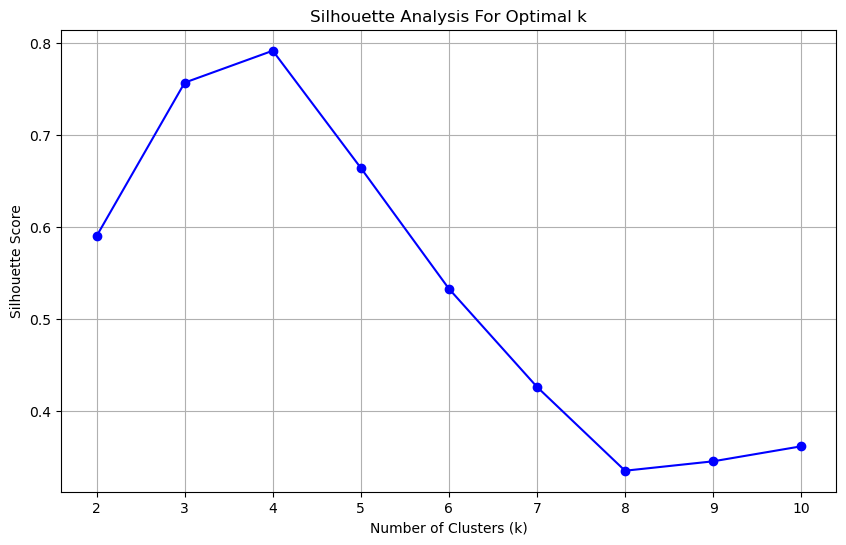

In [4]:
# Calculate silhouette scores for different k values
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"For k={k}, Silhouette Score={score:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [5]:
# Perform K-Means clustering with optimal k
optimal_k = 5  # Adjust based on your analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

# Get cluster centers
centroids = kmeans.cluster_centers_

c:\Users\mils0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


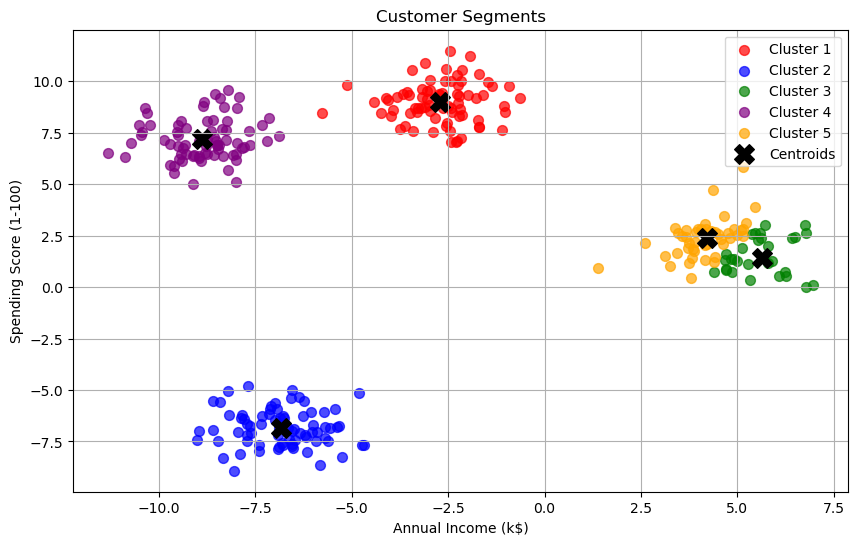

In [6]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']  # Add more if k > 5

for i in range(optimal_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i], 
                label=f'Cluster {i+1}', alpha=0.7)
    
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', 
            label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# If using more than 2 features, apply PCA
if X.shape[1] > 2:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Repeat clustering on PCA components
    kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
    labels_pca = kmeans_pca.fit_predict(X_pca)
    
    # Visualize PCA clusters
    plt.figure(figsize=(10, 6))
    for i in range(optimal_k):
        plt.scatter(X_pca[labels_pca == i, 0], X_pca[labels_pca == i, 1], 
                    s=50, c=colors[i], label=f'Cluster {i+1}', alpha=0.7)
        
    plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], 
                s=200, c='black', marker='X', label='Centroids')
    
    plt.title('Customer Segments (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
# Final evaluation
final_score = silhouette_score(X, labels)
print(f"\nFinal Silhouette Score for k={optimal_k}: {final_score:.3f}")

# Interpretation of clusters (for mall dataset)
if 'df' in locals():
    df['Cluster'] = labels
    cluster_stats = df.groupby('Cluster')[['Income', 'SpendingScore']].mean()
    print("\nCluster Statistics:")
    print(cluster_stats)


Final Silhouette Score for k=5: 0.664
